In [100]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [98]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
import warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)
warnings.filterwarnings("ignore", category= FutureWarning)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [4]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [121]:
loj_model = LogisticRegression(solver="liblinear").fit(x,y)

In [13]:
loj_model.intercept_

array([-5.88679617])

In [15]:
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

In [16]:
loj_model.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [18]:
y_pred= loj_model.predict(x)

In [19]:
confusion_matrix(y,y_pred) #karmaşıklık matriksi

array([[448,  52],
       [121, 147]], dtype=int64)

In [20]:
accuracy_score(y,y_pred) #doğruluk oranı

0.7747395833333334

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [28]:
loj_model.predict_proba(x)[0:10]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

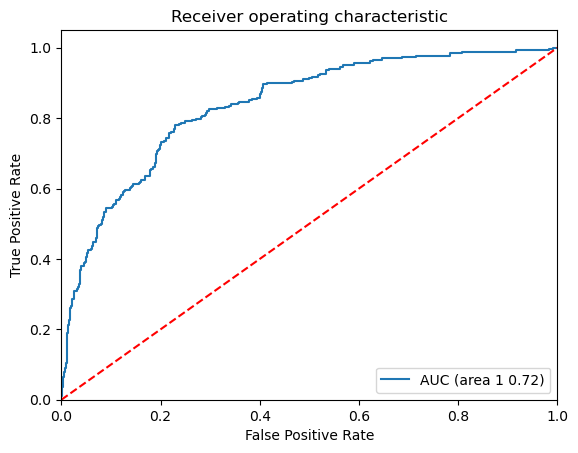

In [30]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(x) [:,1])

plt.figure()

plt.plot(fpr, tpr, label='AUC (area 1 %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

In [34]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
loj_model= LogisticRegression(solver= "liblinear").fit(x_train,y_train)

In [36]:
y_pred= loj_model.predict(x_test)

In [37]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [41]:
cross_val_score(loj_model, x_test, y_test, cv= 10).mean()

0.7704710144927536

# K-EN Yakın Komşu

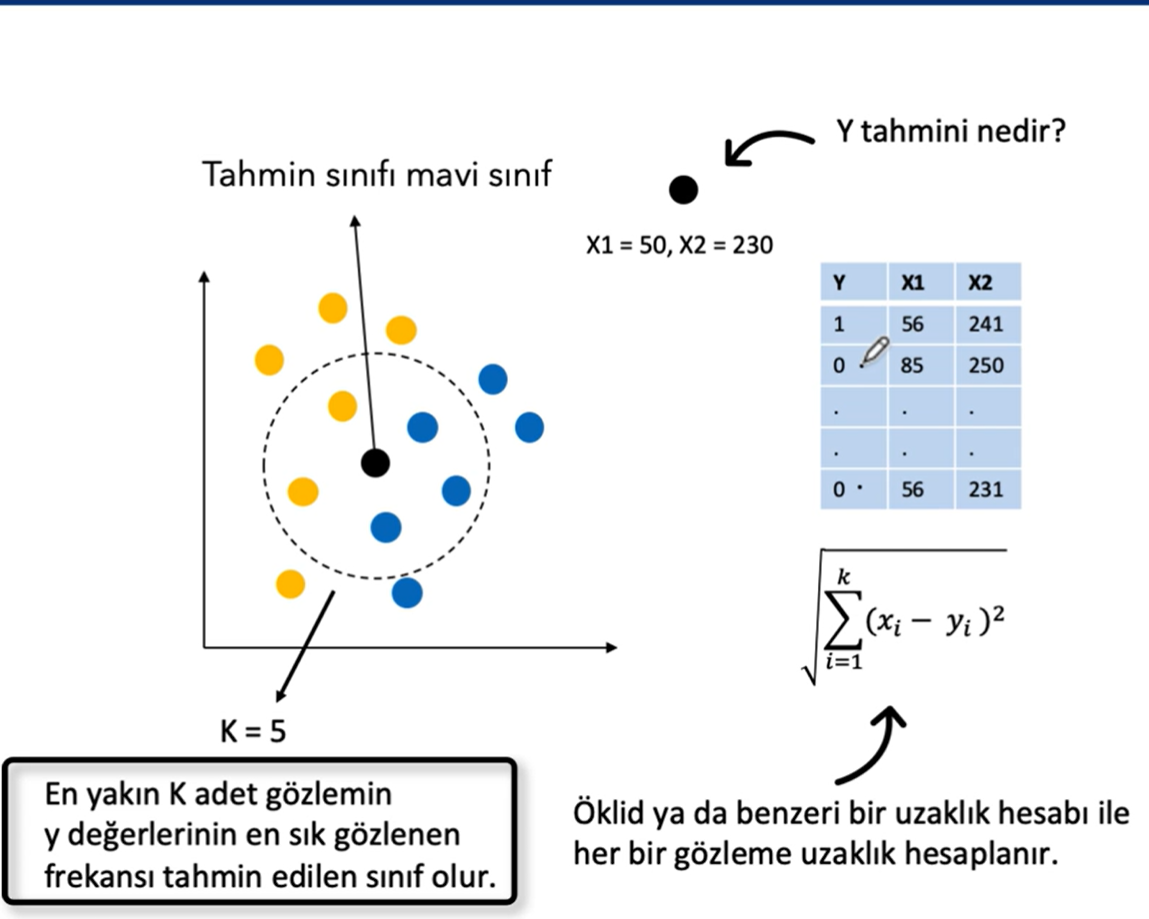

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [43]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")

In [44]:
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [45]:
knn_model= KNeighborsClassifier().fit(x_train,y_train)

In [46]:
knn_model

KNeighborsClassifier()

In [47]:
y_pred= knn_model.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [51]:
knn= KNeighborsClassifier()

In [52]:
knn_params= {"n_neighbors":np.arange(1,50)}

In [53]:
knn_cv_model= GridSearchCV(knn,knn_params, cv=10).fit(x_train,y_train)

In [54]:
knn_cv_model.best_score_

0.748637316561845

In [55]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [122]:
knn_tuned = KNeighborsClassifier(n_neighbors= 11).fit(x_train,y_train)

In [60]:
y_pred= knn_tuned.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [62]:
knn_tuned.score(x_test,y_test) # kısa yol

0.7316017316017316

# Support Vector Machines (SVM)

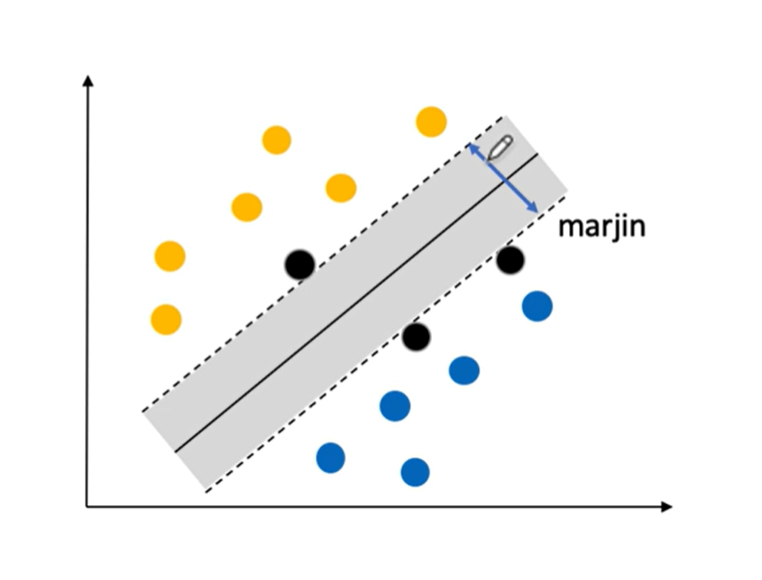

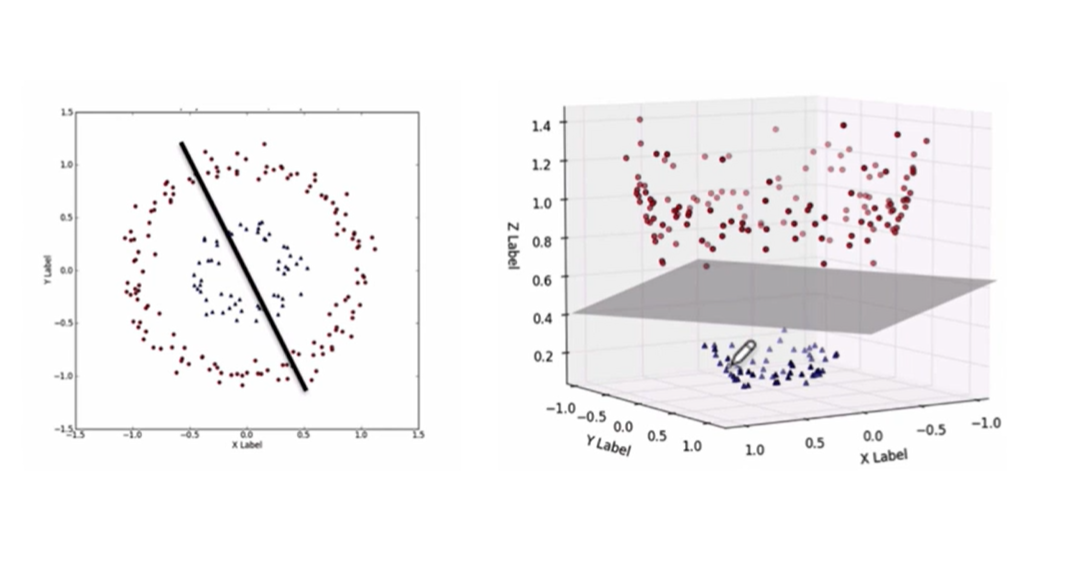

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [4]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")

In [8]:
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
svm_model= SVC(kernel= "linear").fit(x_train,y_train)

In [12]:
svm_model

SVC(kernel='linear')

In [13]:
y_pred= svm_model.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [18]:
svm_params= {"C":np.arange(1,5),
            "kernel":["linear","rbf"]}

In [17]:
svm= SVC()

In [19]:
svm_cv_model= GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [20]:
svm_cv_model.best_score_

0.7839044652128765

In [21]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [123]:
svm_tuned= SVC(C= 2, kernel= "linear").fit(x_train,y_train)

In [26]:
y_pred= svm_tuned.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# Artificial neural networks

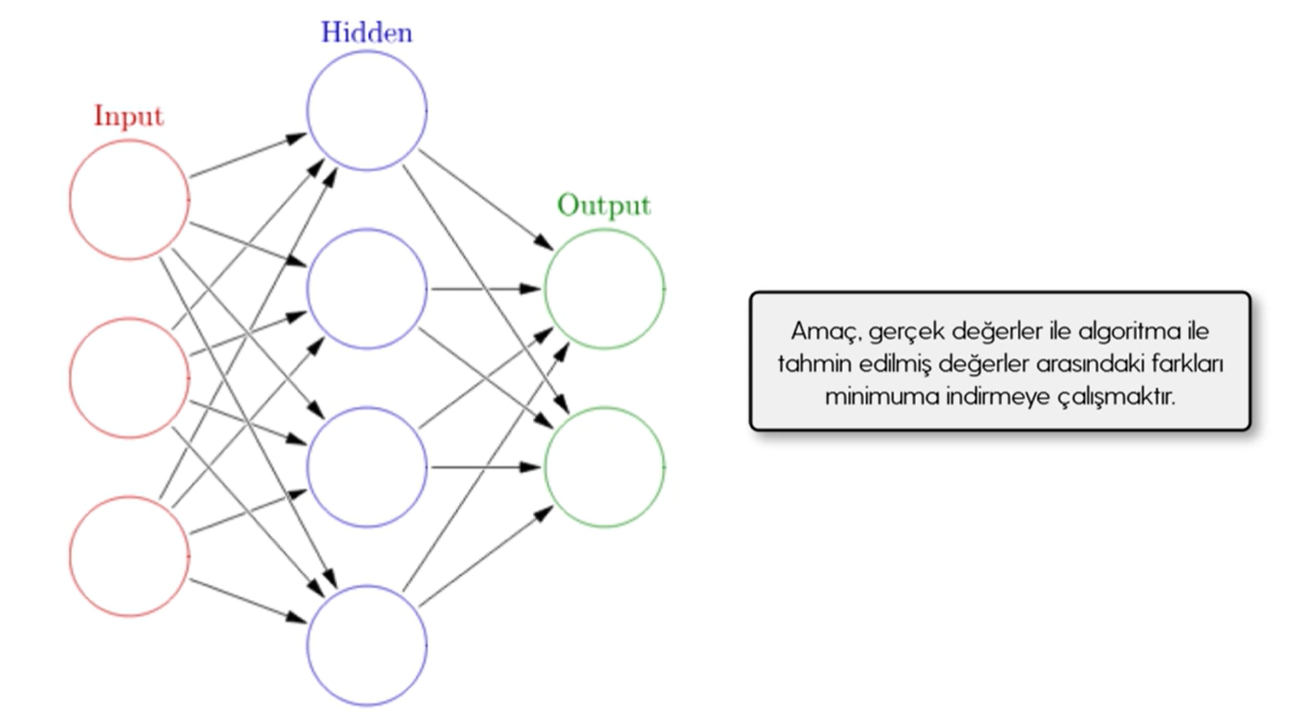

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [28]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [62]:
scaler= StandardScaler()

In [63]:
scaler.fit(x_train)
x_train= scaler.transform(x_train)

In [64]:
scaler.fit(x_test)
x_test= scaler.transform(x_test)

In [30]:
mlpc_model= MLPClassifier().fit(x_train,y_train)

In [31]:
mlpc_model

MLPClassifier()

In [33]:
mlpc_model.coefs_

[array([[ 6.45444925e-02, -1.45724306e-01, -1.78402760e-03,
         -8.29426816e-02, -3.62620725e-02, -1.59528463e-01,
         -1.44318684e-01, -1.49082050e-01, -1.95805489e-01,
         -3.06053930e-02, -1.53487557e-01,  7.90392358e-02,
          1.25638476e-01,  3.84571164e-02,  1.70108154e-01,
          1.41215377e-02, -2.47106870e-02, -3.53728864e-02,
          1.00505266e-01, -6.55616563e-02,  2.26623514e-01,
          1.87855944e-01,  1.93569669e-04,  7.35469381e-02,
          1.57274965e-01,  1.01644594e-01, -1.63297986e-03,
         -8.19642063e-03, -2.53207312e-01, -4.61899481e-02,
          2.14739196e-01,  1.83492423e-01,  8.00502703e-04,
         -1.39858361e-01, -6.16501050e-02,  1.34984348e-02,
         -2.23150209e-01, -1.19055179e-01,  9.28647591e-03,
          1.43016576e-01,  1.52975700e-01,  3.51834441e-01,
          5.73214182e-02,  2.49236636e-01, -1.49158944e-02,
          1.52101575e-01, -2.50990382e-01,  4.97402923e-02,
          1.28931097e-01,  1.04352922e-0

In [34]:
?mlpc_model

In [35]:
y_pred= mlpc_model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [39]:
mlpc_params= {"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)],
             "alpha":[1,5,0.1,0.01,0.03,0.05,0.0001]}

In [49]:
mlpc= MLPClassifier(solver="lbfgs",activation= "logistic") # sınıflandırma problemlerinde activationu logistic yapmamız gerekiyor 

In [50]:
mlpc_cv_model= GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
mlpc_cv_model

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.05, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (100, 100), (3, 5)]},
             verbose=2)

In [52]:
mlpc_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (100, 100)}

In [152]:
mlpc_tuned= MLPClassifier(solver="lbfgs",alpha=5,hidden_layer_sizes=(100,100),activation= "logistic").fit(x_train,y_train)

In [59]:
y_pred= mlpc_tuned.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# CART

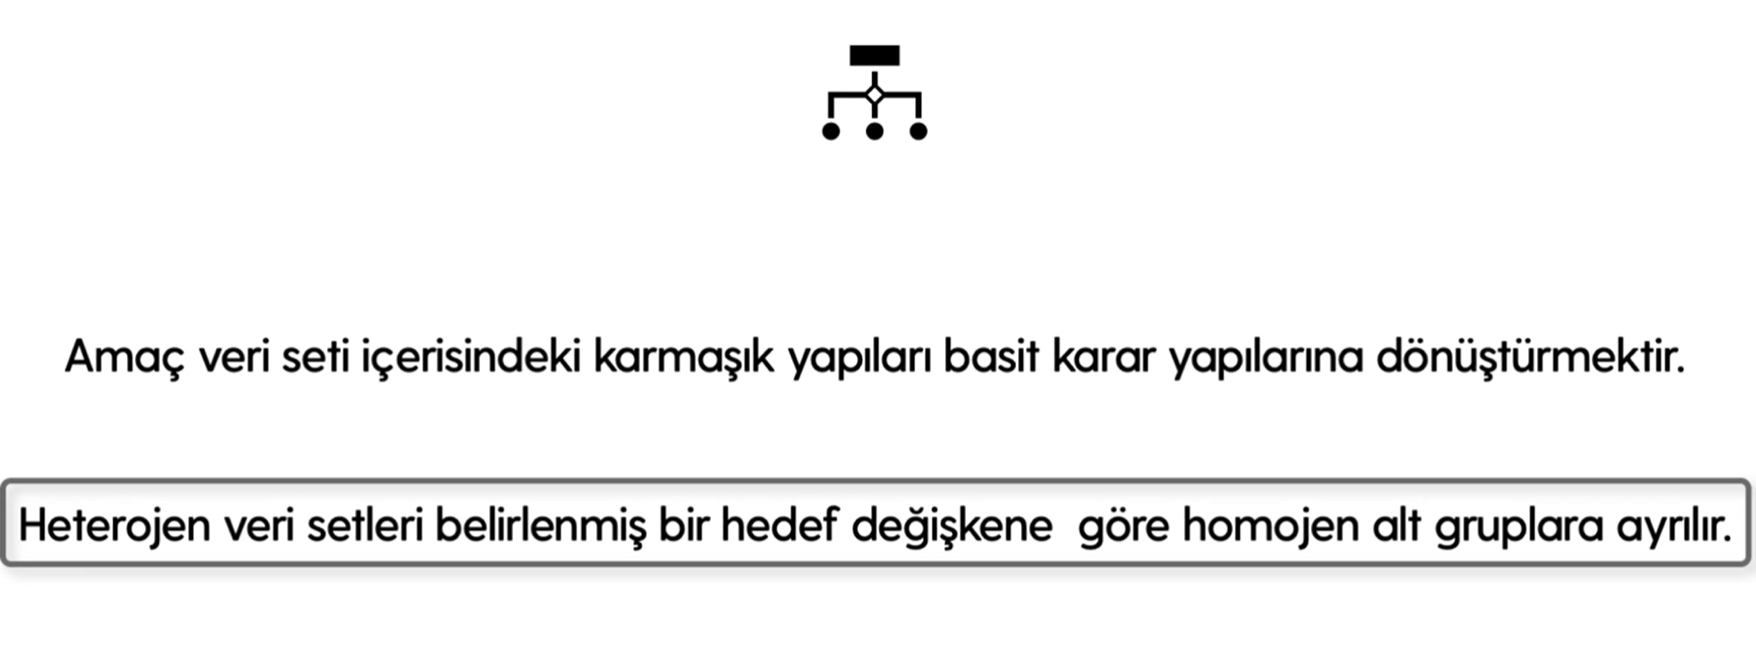

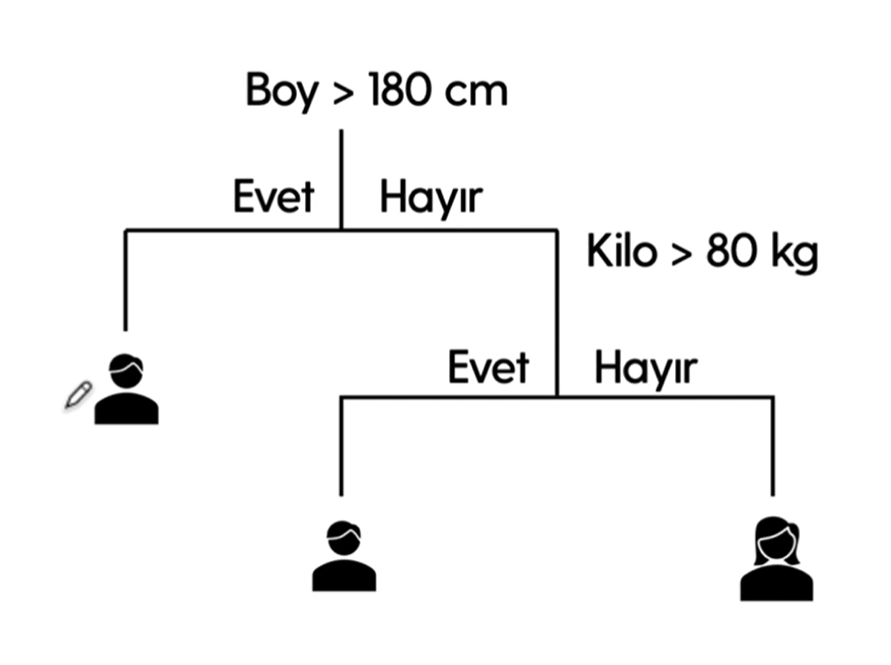

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [67]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42);

In [76]:
cart_model= DecisionTreeClassifier().fit(x_train,y_train)

In [77]:
cart_model

DecisionTreeClassifier()

In [70]:
y_pred= cart_model.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred)

0.7056277056277056

In [80]:
cart= DecisionTreeClassifier()

In [82]:
cart_params= {"max_depth": [1,3,5,8,10],
             "min_samples_split":[2,3,5,10,20,50]}

In [83]:
cart_cv_model= GridSearchCV(cart,cart_params,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [84]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [125]:
cart_tuned= DecisionTreeClassifier(max_depth=5,min_samples_split=50).fit(x_train,y_train)

In [92]:
y_pred= cart_tuned.predict(x_test)

In [93]:
accuracy_score(y_test,y_pred)

0.7575757575757576

# Random Forests

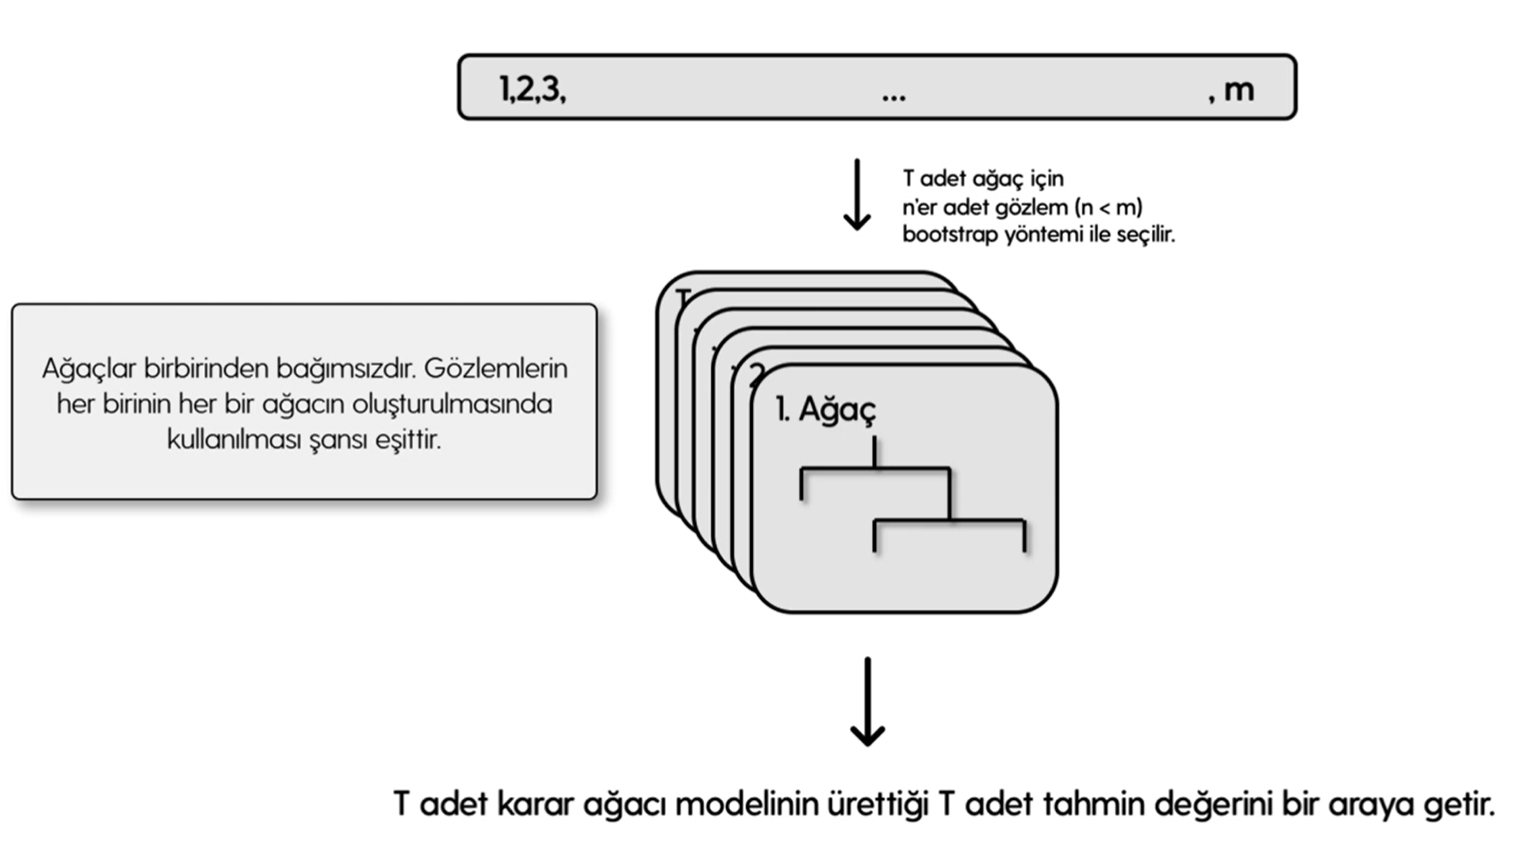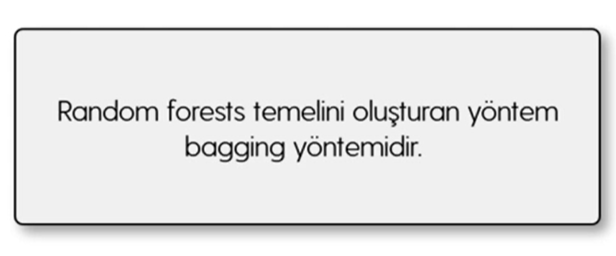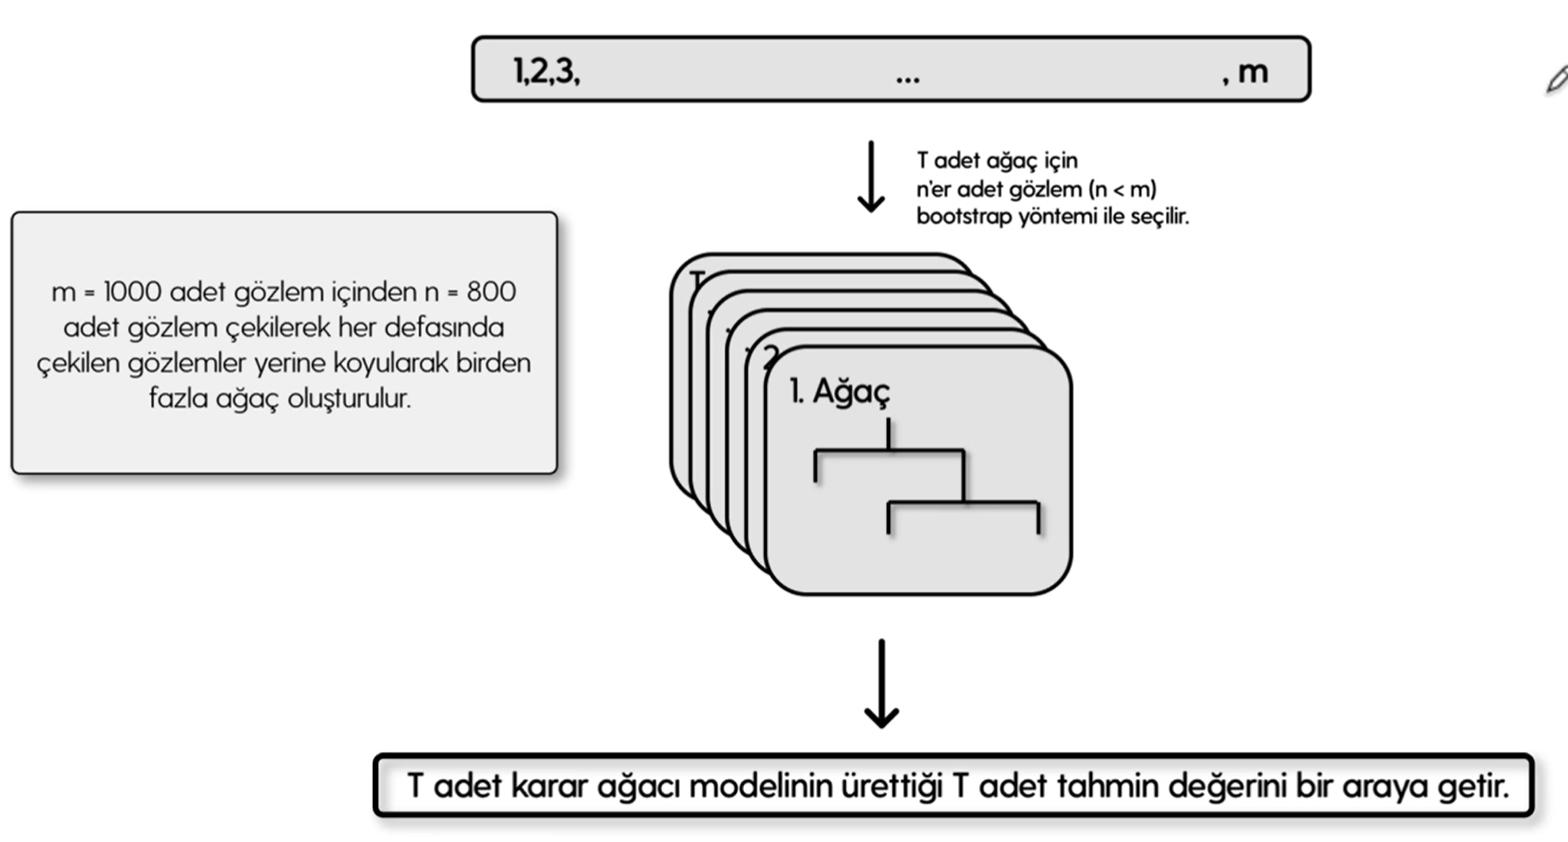

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [4]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [5]:
rf_model= RandomForestClassifier().fit(x_train,y_train)

In [6]:
rf_model

RandomForestClassifier()

In [13]:
y_pred= rf_model.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [17]:
rf= RandomForestClassifier()

In [18]:
rf_params= {"n_estimators":[100,200,500,1000],
           "max_features":[3,5,7,8],
           "min_samples_split": [2,5,10,20]}

In [19]:
rf_cv_model= GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [20]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 200}

In [126]:
rf_tuned= RandomForestClassifier(n_estimators=200,max_features=5,min_samples_split=5).fit(x_train,y_train)

In [6]:
y_pred= rf_tuned.predict(x_test)

In [7]:
accuracy_score(y_test,y_pred)

0.7575757575757576

In [8]:
# değişken önem düzeyi

In [9]:
rf_tuned.feature_importances_

array([0.05501306, 0.35020139, 0.07096524, 0.05014943, 0.0529208 ,
       0.17518745, 0.10316439, 0.14239823])

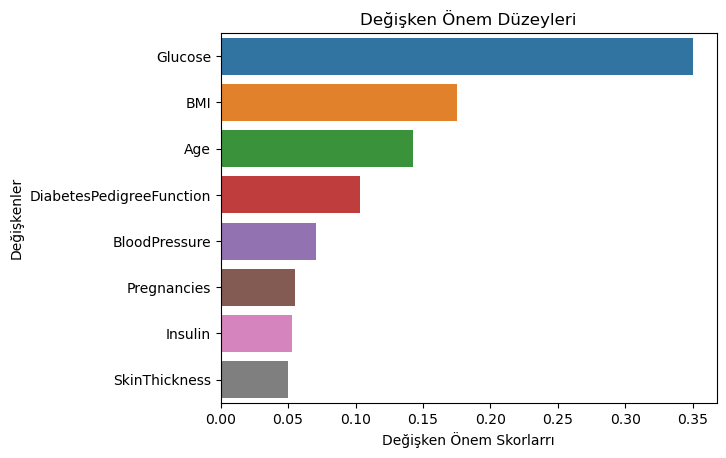

In [11]:
feature= pd.Series(rf_tuned.feature_importances_,
                 index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=feature, y=feature.index)
plt.xlabel('Değişken Önem Skorlarrı')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Gradient Boosting Machines (GBM)

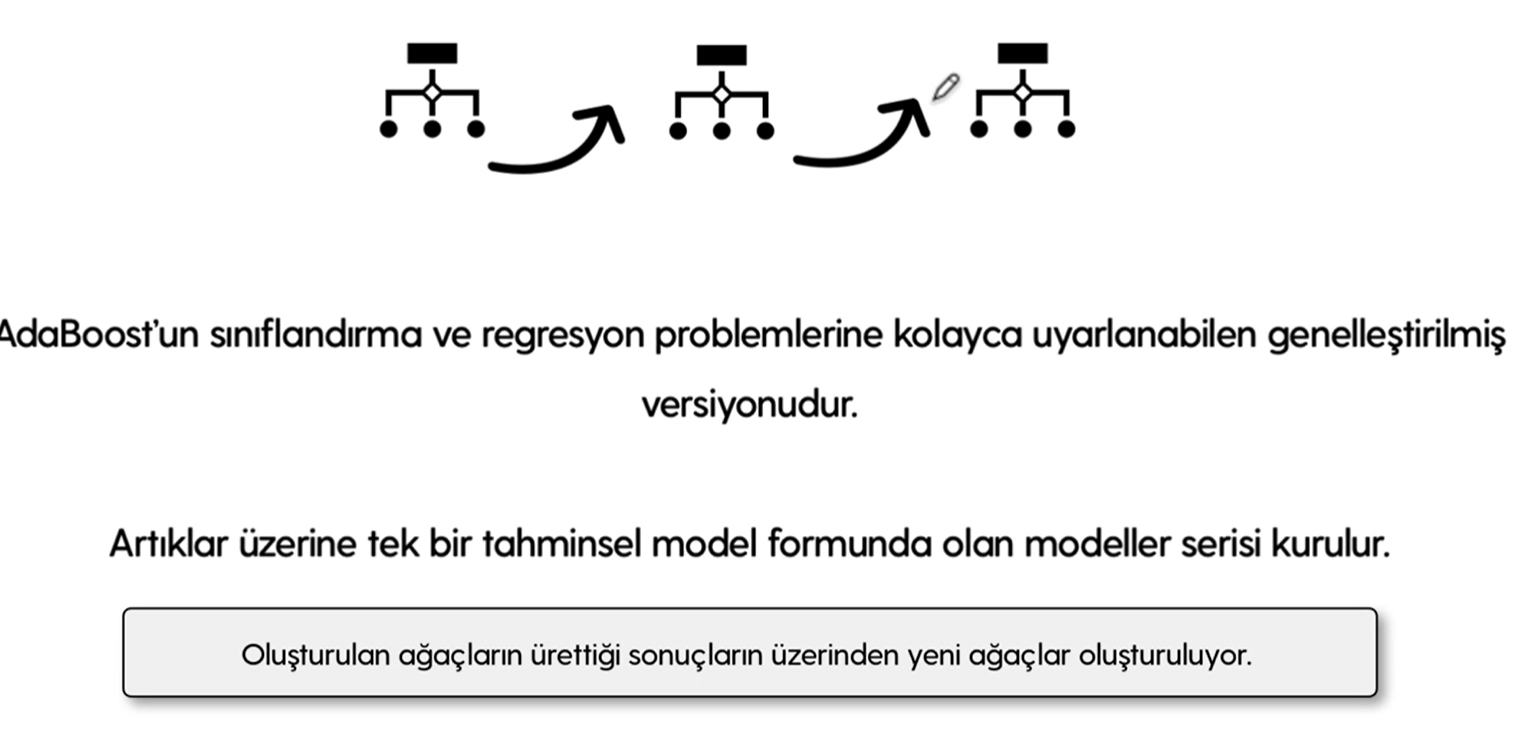

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [12]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [13]:
gbm_model= GradientBoostingClassifier().fit(x_train,y_train)

In [14]:
gbm_model

GradientBoostingClassifier()

In [15]:
?gbm_model

In [16]:
y_pred= gbm_model.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [18]:
gbm= GradientBoostingClassifier()

In [19]:
gbm_params= {"learning_rate":[0.1,0.01,0.001,0.05],
            "n_estimators":[100,300,500,1000],
            "max_depth":[2,3,5,8]}

In [ ]:
gbm_cv_model= GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

In [ ]:
gbm_cv_model.best_params_

In [127]:
gbm_tuned= GradientBoostingClassifier(learning_rate=0.01,
                                      n_estimators=5,
                                      max_depth=500).fit(x_train,y_train)

In [38]:
y_pred= gbm_tuned.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.6536796536796536

In [40]:
# değişken önem düzeyi

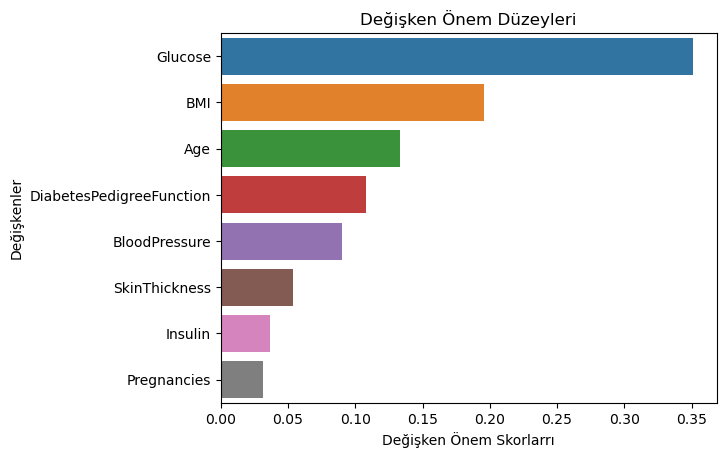

In [41]:
feature= pd.Series(gbm_tuned.feature_importances_,
                 index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=feature, y=feature.index)
plt.xlabel('Değişken Önem Skorlarrı')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# XGBoost

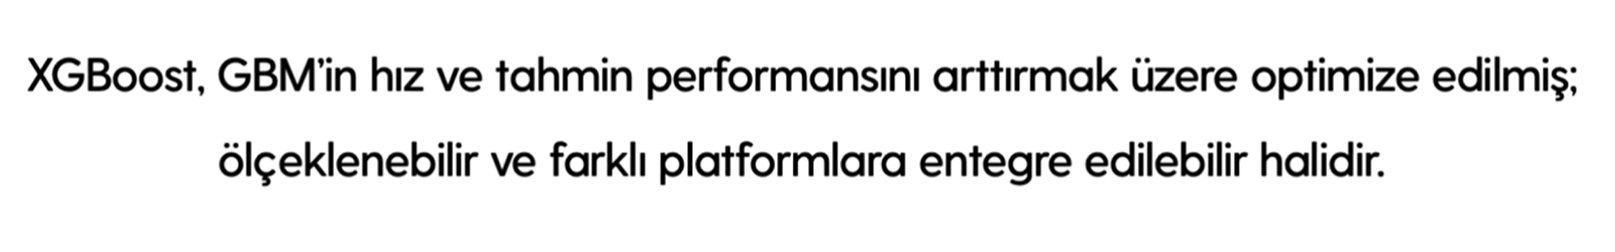

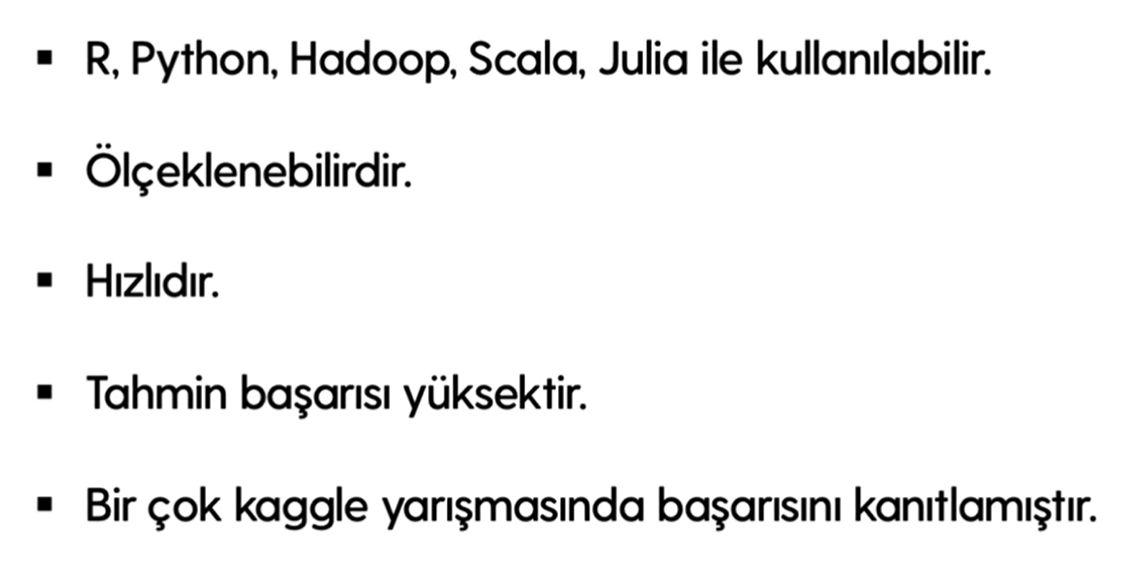

In [43]:
!pip insatll xgboost

ERROR: unknown command "insatll" - maybe you meant "install"



In [156]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [42]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [46]:
xgb_model= XGBClassifier().fit(x_train,y_train)

In [47]:
?xgb_model

In [52]:
y_pred=xgb_model.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [54]:
xgb= XGBClassifier()

In [57]:
xgb_params= {"n_estimators":[100,500,1000],
            "subsample":[0.6,0.8,1],
            "max_depth":[3,5,7],
            "learning_rate":[0.1,0.001,0.01]}

In [58]:
xgb_cv_model= GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [59]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

In [128]:
xgb_tuned= XGBClassifier(learning_rate=0.01 ,
                        max_depth=3 ,
                        n_estimators=500 ,
                        subsample= 0.8).fit(x_train,y_train)

In [61]:
y_pred= xgb_tuned.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred)

0.7619047619047619

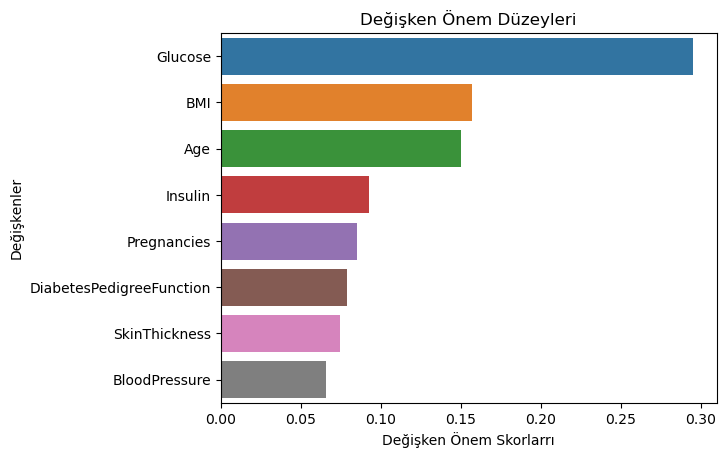

In [65]:
feature= pd.Series(xgb_tuned.feature_importances_,
                 index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=feature, y=feature.index)
plt.xlabel('Değişken Önem Skorlarrı')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Light GBM

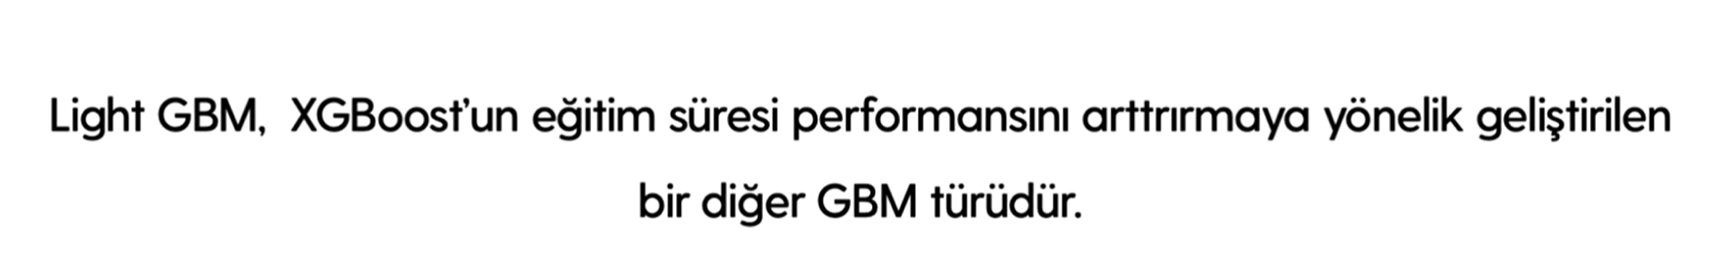

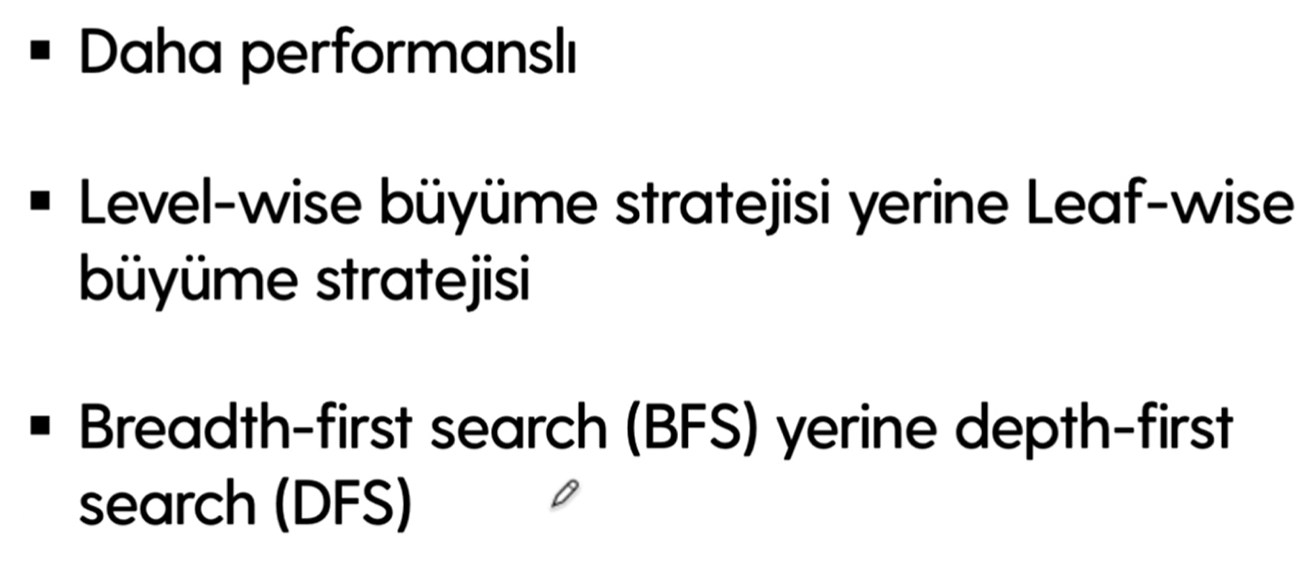

In [68]:
!pip insatll lightgbm

ERROR: unknown command "insatll" - maybe you meant "install"



In [155]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [67]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [97]:
lgbm_model= LGBMClassifier().fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [73]:
lgbm_model

LGBMClassifier()

In [74]:
?lgbm_model

In [75]:
y_predit= lgbm_model.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [77]:
lgbm= LGBMClassifier()

In [78]:
lgbm_params= {"learnin_rate":[0.001,0.01,0.01],
             "n_estimators":[200,500,100],
             "max_depth":[1,2,35,8]}

In [79]:
lgbm_cv_model= GridSearchCV(lgbm,lgbm_params,n_jobs=-1,verbose=2,cv=10).fit(x_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Warning] Unknown parameter: learnin_rate
[LightGBM] [Warning] Unknown parameter: learnin_rate
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [80]:
lgbm_cv_model.best_params_

{'learnin_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}

In [129]:
lgbm_tuned= LGBMClassifier(learning_rate=0.01,
                          max_depth=1,
                          n_estimators=500).fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630


In [86]:
y_pred= lgbm_tuned.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred)

0.7575757575757576

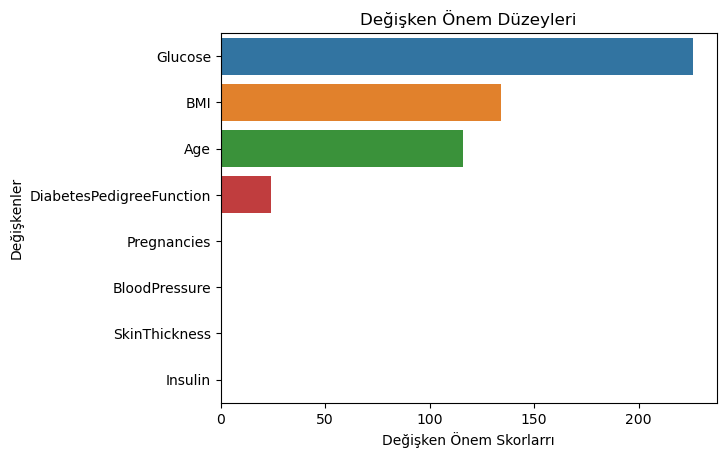

In [88]:
feature= pd.Series(lgbm_tuned.feature_importances_,
                 index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=feature, y=feature.index)
plt.xlabel('Değişken Önem Skorlarrı')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Category Boosting (CatBoost)

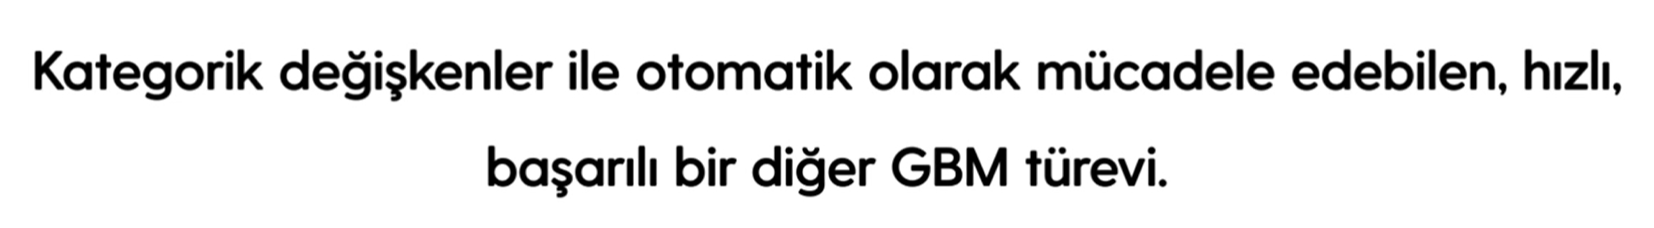

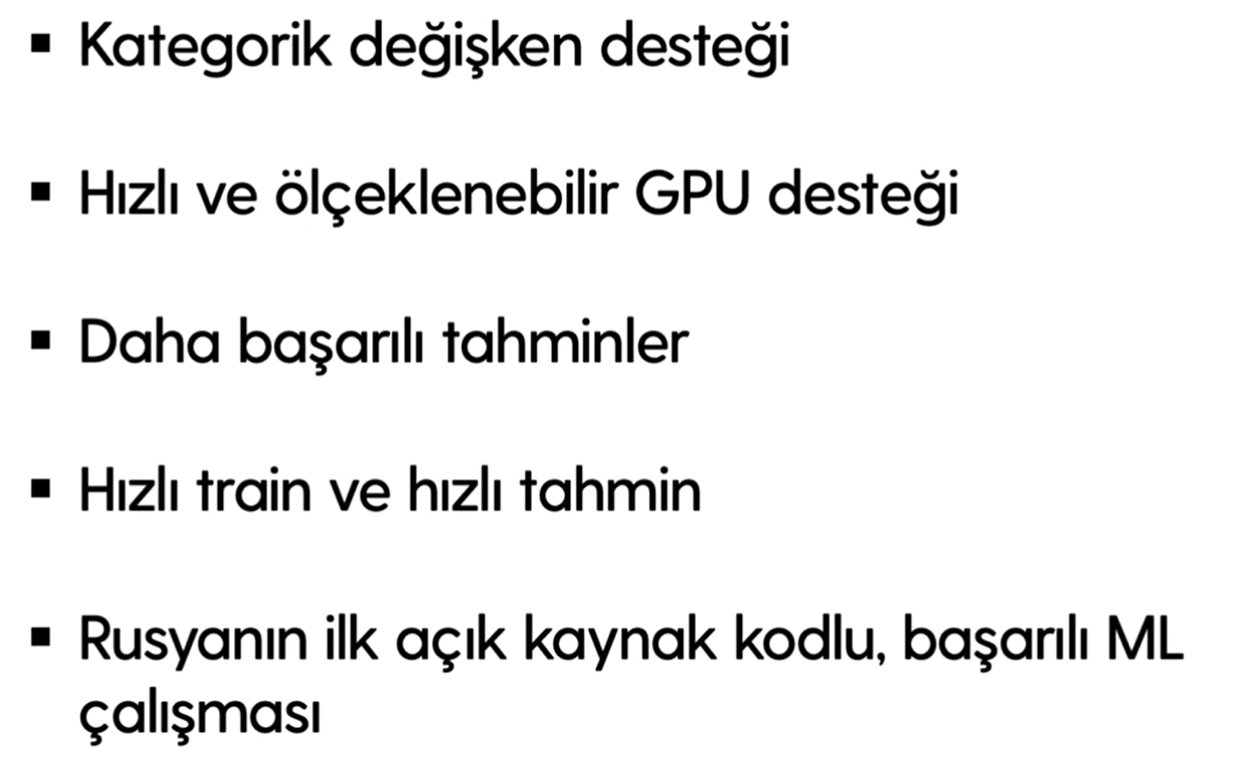

In [90]:
!pip insatll catboost

ERROR: unknown command "insatll" - maybe you meant "install"



In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [89]:
data= pd.read_csv("C:\\data_set\\diabetes.csv")
y = data["Outcome"]
x= data.drop(["Outcome"],axis = 1)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=42)

In [103]:
catb_model= CatBoostClassifier().fit(x_train,y_train,verbose=False)

In [104]:
y_pred= catb_model.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred)

0.7402597402597403

In [110]:
catb= CatBoostClassifier(verbose=False)

In [111]:
catb_params= {"iterations":[200,500,1000],
             "learning_rate": [0.01,0.03,0.1],
             "depth": [4,5,8]}

In [112]:
# catb_cv_model= GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

In [114]:
# catb_cv_model.best_params_

In [130]:
catb_tuned= CatBoostClassifier(depth=8,
                              iterations=200,
                              learning_rate=0.03).fit(x_train,y_train)

0:	learn: 0.6730317	total: 9.05ms	remaining: 1.8s
1:	learn: 0.6582932	total: 17ms	remaining: 1.68s
2:	learn: 0.6413374	total: 29.7ms	remaining: 1.95s
3:	learn: 0.6267884	total: 38.1ms	remaining: 1.87s
4:	learn: 0.6150338	total: 46.6ms	remaining: 1.82s
5:	learn: 0.5988569	total: 64.4ms	remaining: 2.08s
6:	learn: 0.5860830	total: 85.6ms	remaining: 2.36s
7:	learn: 0.5734710	total: 104ms	remaining: 2.5s
8:	learn: 0.5616034	total: 126ms	remaining: 2.67s
9:	learn: 0.5507407	total: 136ms	remaining: 2.59s
10:	learn: 0.5388119	total: 145ms	remaining: 2.49s
11:	learn: 0.5264274	total: 153ms	remaining: 2.4s
12:	learn: 0.5191433	total: 164ms	remaining: 2.35s
13:	learn: 0.5104236	total: 173ms	remaining: 2.3s
14:	learn: 0.5016788	total: 181ms	remaining: 2.23s
15:	learn: 0.4954697	total: 189ms	remaining: 2.18s
16:	learn: 0.4896572	total: 208ms	remaining: 2.23s
17:	learn: 0.4808284	total: 229ms	remaining: 2.31s
18:	learn: 0.4723731	total: 248ms	remaining: 2.37s
19:	learn: 0.4656953	total: 269ms	remain

In [116]:
y_pred= catb_tuned.predict(x_test)

In [118]:
accuracy_score(y_test,y_pred)

0.7489177489177489

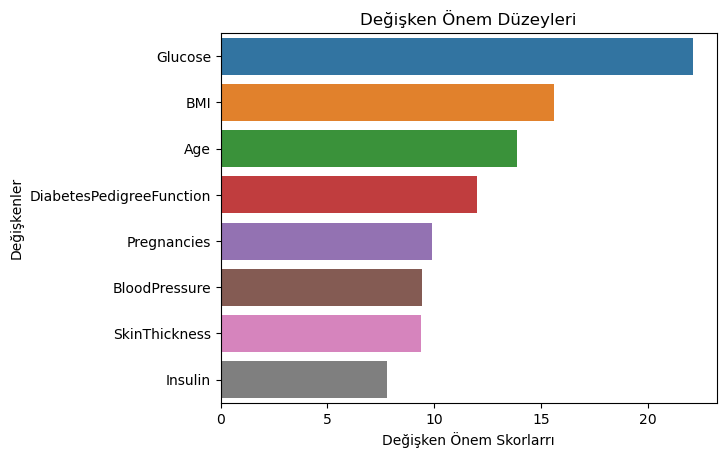

In [119]:
feature= pd.Series(catb_tuned.feature_importances_,
                 index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=feature, y=feature.index)
plt.xlabel('Değişken Önem Skorlarrı')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Tüm Modellerin Karşılaştırılması

In [153]:
modeller =[
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]
sonuc= []
sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns=["Modeller", "Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does n

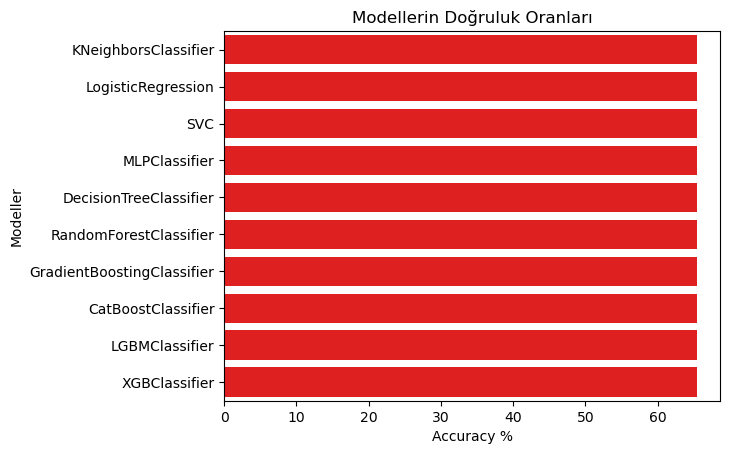

In [149]:
sonuclar = sonuclar.sort_values(by='Accuracy', ascending=False)

sns.barplot(x='Accuracy',y='Modeller',data= sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [143]:
sonuclar

,Modeller,Accuracy
1,LogisticRegression,76.623377
9,XGBClassifier,76.190476
4,DecisionTreeClassifier,75.757576
8,LGBMClassifier,75.757576
7,CatBoostClassifier,74.891775
2,SVC,74.458874
5,RandomForestClassifier,74.025974
0,KNeighborsClassifier,73.160173
3,MLPClassifier,72.727273
6,GradientBoostingClassifier,65.367965


In [160]:

?gbm_model

In [161]:
# Logistic Regression
loj_model = LogisticRegression(solver="liblinear").fit(x,y)

# K-EN Yakın Komşu
knn_model= KNeighborsClassifier().fit(x_train,y_train)
knn_params= {"n_neighbors":np.arange(1,50)}

# Support Vector Machines (SVM)
svm_model= SVC(kernel= "linear").fit(x_train,y_train)
svm_params= {"C":np.arange(1,5),
            "kernel":["linear","rbf"]}

# Artificial neural networks
scaler= StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
scaler.fit(x_test)
x_test= scaler.transform(x_test)
mlpc_model= MLPClassifier().fit(x_train,y_train)
mlpc_params= {"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)],
             "alpha":[1,5,0.1,0.01,0.03,0.05,0.0001]}
mlpc= MLPClassifier(solver="lbfgs",activation= "logistic") # sınıflandırma problemlerinde activationu logistic yapmamız gerekiyor 


# CART
cart_model= DecisionTreeClassifier().fit(x_train,y_train)
cart_params= {"max_depth": [1,3,5,8,10],
             "min_samples_split":[2,3,5,10,20,50]}


# Random Forest
rf_model= RandomForestClassifier().fit(x_train,y_train)
rf_params= {"n_estimators":[100,200,500,1000],
           "max_features":[3,5,7,8],
           "min_samples_split": [2,5,10,20]}


# Gradient Boosting Machines (GBM)
gbm_model= GradientBoostingClassifier().fit(x_train,y_train)
gbm_params= {"learning_rate":[0.1,0.01,0.001,0.05],
            "n_estimators":[100,300,500,1000],
            "max_depth":[2,3,5,8]}

# XGBoost
xgb_model= XGBClassifier().fit(x_train,y_train)
xgb_params= {"n_estimators":[100,500,1000],
            "subsample":[0.6,0.8,1],
            "max_depth":[3,5,7],
            "learning_rate":[0.1,0.001,0.01]}

# Light GBM
lgbm_model= LGBMClassifier().fit(x_train,y_train)
lgbm_params= {"learnin_rate":[0.001,0.01,0.01],
             "n_estimators":[200,500,100],
             "max_depth":[1,2,35,8]}


# Category Boosting (CatBoost)
catb_model= CatBoostClassifier().fit(x_train,y_train,verbose=False)
catb_params= {"iterations":[200,500,1000],
             "learning_rate": [0.01,0.03,0.1],
             "depth": [4,5,8]}


C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 